# PROJECT ON BANK DATA 1

### Business understanding

In [10]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')




In [11]:
df=pd.read_csv('bank_data.csv')

In [12]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,NaN,no,1787.0,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,NaN,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no


In [13]:
df.shape

(4521, 18)

In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4515.000000,4521.000000,4514.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1420.750831,15.915284,263.884360,2.793630,39.766645,0.542579
std,10.576211,3009.178500,8.247667,259.812643,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,68.500000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1477.000000,21.000000,329.750000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Total missing values by columns

In [17]:
df.isnull().sum()

age           0
job           0
marital      11
education     7
default       0
balance       6
housing       3
loan          3
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

### Tatal missing values

In [18]:
q=df.isnull().sum()

In [19]:
q.sum()

72

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

## Showing Heat map

<AxesSubplot:>

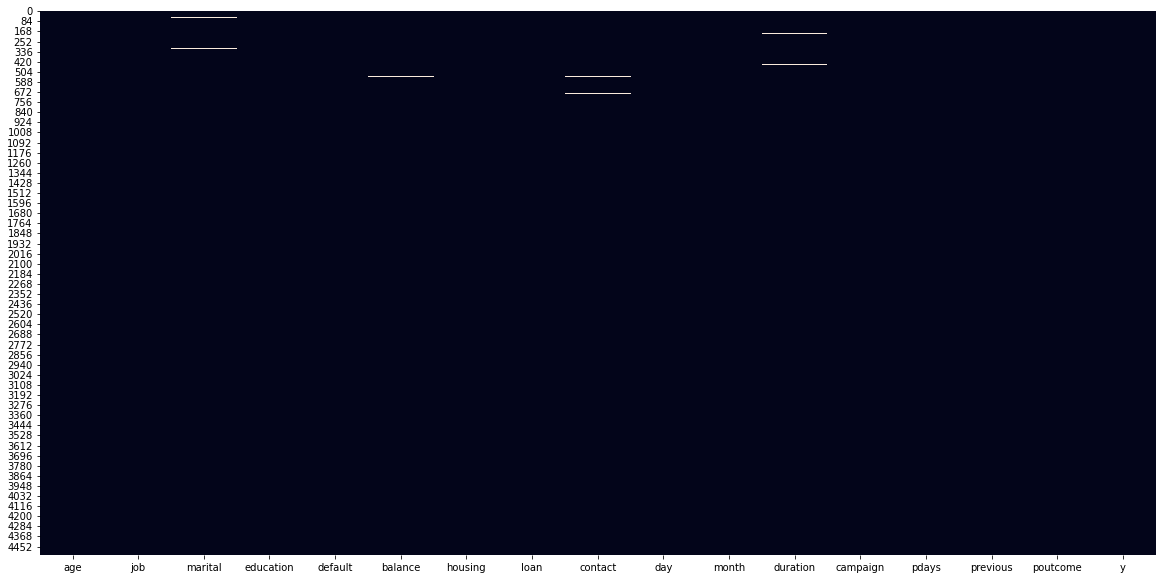

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False)

### before proceeding to model building lets fill missing values

In [22]:
Counter(df['marital'])

Counter({'married': 2790, 'single': 1193, 'divorced': 527, nan: 11})

### lets fill them by married or single or Divorced or NAN



In [23]:
var=df[df['marital'].isnull()].index.tolist()

In [24]:
print(var)

[46, 49, 50, 52, 54, 56, 306, 310, 312, 367, 445]


#### if df[job] is student then most probably it is single in marital

In [25]:
df['job'][var] # no student is there

46      blue-collar
49           admin.
50      blue-collar
52       technician
54      blue-collar
56       management
306    entrepreneur
310     blue-collar
312     blue-collar
367      management
445     blue-collar
Name: job, dtype: object

In [26]:
Counter(df['marital'])  # looking to the ratio

Counter({'married': 2790, 'single': 1193, 'divorced': 527, nan: 11})

In [27]:
l=[2790,1193,527]
c=sum(l)

### doing ratio proportion of {'married': 2790, 'single': 1193, 'divorced': 527, nan: 11}

In [28]:
s=[]
for i in l:
    w=(i/c)*100
    s.append(int((w/100)*11))
print(s)


[6, 2, 1]


In [29]:
df['marital'].iloc[var[:6]]='married'

In [30]:
Counter(df['marital'])

Counter({'married': 2796, 'single': 1193, 'divorced': 527, nan: 5})

In [31]:
df['marital'].iloc[var[6:10]]='single'

In [32]:
Counter(df['marital'])

Counter({'married': 2796, 'single': 1197, 'divorced': 527, nan: 1})

In [33]:
df['marital'].iloc[var[10:]]='divorced'

In [34]:
Counter(df['marital'])

Counter({'married': 2796, 'single': 1197, 'divorced': 528})

In [35]:
df.isnull().sum()

age           0
job           0
marital       0
education     7
default       0
balance       6
housing       3
loan          3
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [36]:
Counter(df['education']) # check 

Counter({nan: 7,
         'secondary': 2302,
         'tertiary': 1349,
         'primary': 676,
         'unknown': 187})

In [37]:
var=df[df['education'].isnull()].index.tolist()

In [38]:
var

[0, 37, 111, 358, 365, 515, 770]

In [39]:
df['job'][var]

0       unemployed
37     blue-collar
111     management
358         admin.
365        student
515     unemployed
770    blue-collar
Name: job, dtype: object

In [40]:
pd.crosstab(df['education'],df['job'],margins=True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
education,,,,,,,,,,,,,
primary,17,369,26,57,39,80,15,25,2,15,24,7,676
secondary,392,522,58,28,116,105,76,363,46,520,68,8,2302
tertiary,51,12,73,22,786,31,88,16,19,211,32,8,1349
unknown,17,41,11,5,27,14,4,13,16,22,2,15,187
All,477,944,168,112,968,230,183,417,83,768,126,38,4514


In [41]:
df['education'][111]='tertiary'
df['education'][0]='secondary'
df['education'][37]='secondary'
df['education'][358]='secondary'
df['education'][365]='secondary'
df['education'][515]='primary'
df['education'][770]='secondary'


In [42]:
Counter(df['education'])

Counter({'secondary': 2307, 'tertiary': 1350, 'primary': 677, 'unknown': 187})

In [43]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       6
housing       3
loan          3
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [44]:
df['balance'].fillna(df['balance'].mean(),inplace=True)

In [45]:
df['balance'].isnull().sum()

0

In [46]:
df.isnull().sum() # check

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       3
loan          3
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [47]:
Counter(df['housing'])

Counter({'no': 1961, 'yes': 2557, nan: 3})

In [48]:
var=df[df['housing'].isnull()].index.tolist()

In [49]:
var

[3131, 3215, 3391]

In [50]:
df['housing'][3131]='yes'
df['housing'][3215]='yes'
df['housing'][3391]='no'

In [51]:
Counter(df['housing']) # check

Counter({'no': 1962, 'yes': 2559})

In [52]:
Counter(df['loan'])

Counter({'no': 3827, 'yes': 691, nan: 3})

In [53]:
var=df[df['loan'].isnull()].index.tolist()

In [54]:
var

[3138, 3293, 3469]

In [55]:
df['loan'][3138]='no'
df['loan'][3293]='no'
df['loan'][3469]='no'

In [56]:
df.isnull().sum() # check

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      35
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [57]:
Counter(df['contact'])

Counter({'cellular': 2869, 'unknown': 1319, 'telephone': 298, nan: 35})

In [58]:
var=df[df['contact'].isnull()].index.tolist()

In [59]:
df['contact'][var[0:25]]='cellular'
df['contact'][var[25:]]='unknown'



In [60]:
Counter(df['contact'])

Counter({'cellular': 2894, 'unknown': 1329, 'telephone': 298})

In [61]:
df.isnull().sum() # check

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     7
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [76]:
var=df[df['duration'].isnull()].index.tolist()

In [77]:
var

[1, 15, 185, 345, 443, 660, 665]

<AxesSubplot:xlabel='duration'>

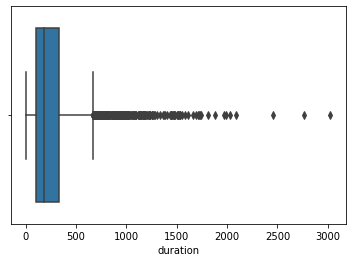

In [63]:
sns.boxplot(df['duration'])

In [64]:
df['duration'].max()

3025.0

In [65]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4514.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1420.750831,15.915284,263.884360,2.793630,39.766645,0.542579
std,10.576211,3007.180594,8.247667,259.812643,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,446.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1476.000000,21.000000,329.750000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [78]:
# taking average of Q1 ,Q2 and Q3
var1=104+185+329.75
print(var1/3)

206.25


In [79]:
df['duration'][var]=206.25

In [80]:
var

[1, 15, 185, 345, 443, 660, 665]

In [81]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [82]:
import pickle 
file=open('project.pkl','bw')
pickle.dump(df,file)
file.close()

In [83]:
import os
os.getcwd()

'c:\\Users\\user\\Desktop'

In [95]:
file1=open('project.pkl','br')
dfnew=pickle.load(file1)

In [96]:
dfnew

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,secondary,no,1787.0,no,no,cellular,19,oct,79.00,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,206.25,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.00,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.00,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.00,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329.00,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153.00,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151.00,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129.00,4,211,3,other,no


In [97]:
dfnew.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [99]:
dfnew.drop('month',axis=1,inplace=True)  # month column we create many dummies columns it makes complex the model

In [100]:
dfnew

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,secondary,no,1787.0,no,no,cellular,19,79.00,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,206.25,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,185.00,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,199.00,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,226.00,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,329.00,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,153.00,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,151.00,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,129.00,4,211,3,other,no


In [101]:
dfnew=pd.get_dummies(dfnew,drop_first=True)

In [102]:
dfnew

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787.0,19,79.00,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,4789.0,11,206.25,1,339,4,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,35,1350.0,16,185.00,1,330,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,30,1476.0,3,199.00,4,-1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
4,59,0.0,5,226.00,1,-1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333.0,30,329.00,5,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4517,57,-3313.0,9,153.00,1,-1,0,0,0,0,...,0,1,1,1,0,1,0,0,1,0
4518,57,295.0,19,151.00,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137.0,6,129.00,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
X=dfnew.drop(['y_yes'],axis=1)

In [105]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787.0,19,79.00,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,33,4789.0,11,206.25,1,339,4,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,35,1350.0,16,185.00,1,330,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,30,1476.0,3,199.00,4,-1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,59,0.0,5,226.00,1,-1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333.0,30,329.00,5,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4517,57,-3313.0,9,153.00,1,-1,0,0,0,0,...,1,0,1,1,1,0,1,0,0,1
4518,57,295.0,19,151.00,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137.0,6,129.00,4,211,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [106]:
y=dfnew['y_yes']

In [107]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y_yes, Length: 4521, dtype: uint8

### Use StratifiedShuffleSplit

In [108]:
from sklearn.model_selection import StratifiedShuffleSplit

In [109]:
sss=StratifiedShuffleSplit(n_splits=3,test_size=0.3)
sss.get_n_splits(X,y)

3

In [111]:
for train_i,test_i in sss.split(X,y):
    print('Train',train_i,'test',test_i)
    X_train,X_test=X.iloc[train_i],X.iloc[test_i]
    y_train,y_test=y[train_i],y[test_i]

Train [ 152  293 1697 ... 2139 1355 2447] test [3364 2439 2176 ... 2886 4308 4145]
Train [2631 1337 2793 ... 4116 3224 1719] test [3052 3313 2089 ... 2401 1362 2980]
Train [2216 3766 2638 ... 1882 2352 2826] test [4302 3731 1468 ... 2249 3828 2917]


In [117]:
X_train.shape

(3164, 31)

In [116]:
X_test.shape

(1357, 31)

 # DATA preprocessing

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
StandardScaler().fit(X)

StandardScaler()

In [123]:
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

# Training the model using Logistic Regression because it is a classification

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
model=LogisticRegression().fit(X_train,y_train)

In [128]:
model

LogisticRegression()

In [154]:
prediction=model.predict(X_test)


In [148]:
from sklearn.metrics import *

In [141]:
print(confusion_matrix(y_test,prediction))

[[1176   25]
 [ 110   46]]


<AxesSubplot:>

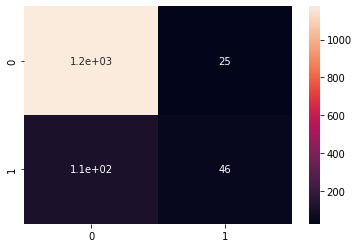

In [156]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction), annot=True)


In [146]:
model.score(X_train,y_train)

0.9029709228824273

In [147]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1201
           1       0.65      0.29      0.41       156

    accuracy                           0.90      1357
   macro avg       0.78      0.64      0.68      1357
weighted avg       0.88      0.90      0.88      1357



In [149]:
mean_absolute_error(y_test,prediction)# MAE

20.689019896831244

In [150]:
r2_score(y_test,prediction)

0.022209056555434592

In [151]:
model.score(X_test,y_test)

0.9005158437730287

# Oue model is 90% accurate